In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading in the data
general_data = pd.read_csv("../population-segmentation-data/Udacity_AZDIAS_052018.csv", sep=";")
customer_data = pd.read_csv("../population-segmentation-data/Udacity_CUSTOMERS_052018.csv", sep=";")
train_data = pd.read_csv("../population-segmentation-data/Udacity_MAILOUT_052018_TRAIN.csv", sep=";")
test_data = pd.read_csv("../population-segmentation-data/Udacity_MAILOUT_052018_TEST.csv", sep=";")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
general_data.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
customer_data.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [5]:
train_data.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [6]:
test_data.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
4,1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4


In [7]:
# Getting the column types and seeing how many non-null values there are
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42962 entries, 0 to 42961
Columns: 367 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(6)
memory usage: 120.3+ MB


In [8]:
# Storing the names of the categorical columns that need to be encoded or transformed to ints
encode_columns = list(train_data.select_dtypes(exclude=["float64", "int64"]).columns)
print(encode_columns)

['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ']


In [9]:
# Viewing the columns that need to be converted
train_data.select_dtypes(exclude=["float64", "int64"])

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,5D,5,34,D19_UNBEKANNT,1992-02-10 00:00:00,W
1,5B,5,32,D19_TELKO_MOBILE,1997-05-14 00:00:00,W
2,2D,2,14,D19_LEBENSMITTEL,1995-05-24 00:00:00,O
3,2D,2,14,D19_UNBEKANNT,1992-02-10 00:00:00,W
4,7B,7,41,D19_BEKLEIDUNG_GEH,1992-02-10 00:00:00,W
...,...,...,...,...,...,...
42957,3C,3,24,D19_HAUS_DEKO,1992-02-10 00:00:00,W
42958,6B,6,43,D19_HAUS_DEKO,1992-02-10 00:00:00,O
42959,4A,4,22,D19_BUCH_CD,1992-02-10 00:00:00,W
42960,8A,8,51,D19_BUCH_CD,1992-02-12 00:00:00,W


In [10]:
# Getting the number of rows that do not have any null values
sum(train_data.apply(lambda x: sum(x.isnull().values), axis = 1)<1)

26

In [11]:
def analyze_nulls(df, column):
    """
    Creates a bar graph that compares the number of responses in observations where the data is missing vs when it is not
    param df: A dataframe with categorical features
    param column: A column that contains missing values
    return: A graph that compares the number of responses for when the data is missing vs when it is not
    """
    df = df.copy()
    
    # Creating a variable indicating whether or not a value is missing
    df[column] = np.where(df[column].isnull(), 1, 0)
    
    # Grouping the number of responses with whether or not a value is missing for the column and creating a bar graph
    df.groupby(column)['RESPONSE'].mean().plot.bar()
    
    # Using the column name as title displaying the graph
    plt.title(column)
    plt.show()
    
    
    
    

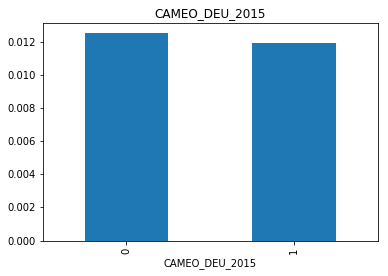

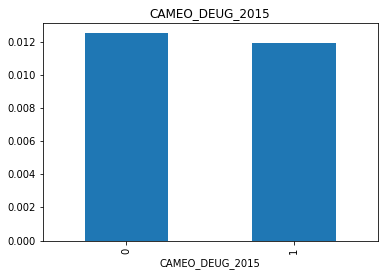

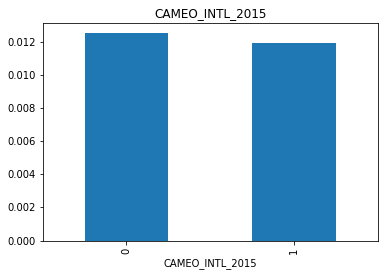

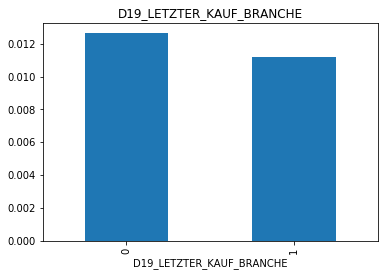

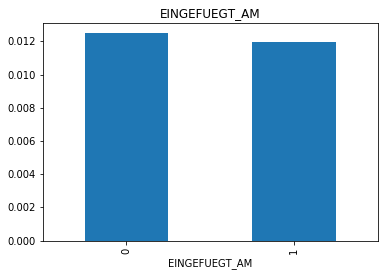

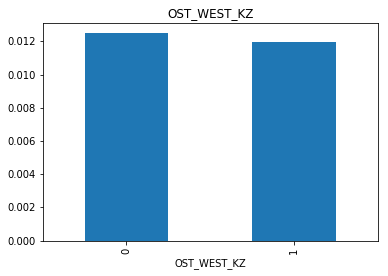

In [12]:
for column in encode_columns:
    analyze_nulls(train_data, column)

In [13]:
# Filling null values of categorical columns with 'Missing'
general_data[encode_columns] = general_data[encode_columns].fillna('Missing')
customer_data[encode_columns] = customer_data[encode_columns].fillna('Missing')
train_data[encode_columns] = train_data[encode_columns].fillna('Missing')
test_data[encode_columns] = test_data[encode_columns].fillna('Missing')

In [14]:
# Verifying that there are no more missing values in the categorical data
general_data[encode_columns].isnull().mean()
customer_data[encode_columns].isnull().mean()
train_data[encode_columns].isnull().mean()
test_data[encode_columns].isnull().mean()

CAMEO_DEU_2015              0.0
CAMEO_DEUG_2015             0.0
CAMEO_INTL_2015             0.0
D19_LETZTER_KAUF_BRANCHE    0.0
EINGEFUEGT_AM               0.0
OST_WEST_KZ                 0.0
dtype: float64

In [15]:
# Viewing the transformed categorical data
general_data.select_dtypes(exclude=["float64", "int64"])

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,Missing,Missing,Missing,Missing,Missing,Missing
1,8A,8,51,Missing,1992-02-10 00:00:00,W
2,4C,4,24,D19_UNBEKANNT,1992-02-12 00:00:00,W
3,2A,2,12,D19_UNBEKANNT,1997-04-21 00:00:00,W
4,6B,6,43,D19_SCHUHE,1992-02-12 00:00:00,W
...,...,...,...,...,...,...
891216,7A,7,41,D19_HAUS_DEKO,1992-02-10 00:00:00,W
891217,9D,9,51,D19_UNBEKANNT,1992-02-10 00:00:00,W
891218,4C,4,24,D19_BEKLEIDUNG_GEH,1992-02-10 00:00:00,W
891219,9D,9,51,D19_UNBEKANNT,1992-02-12 00:00:00,W


In [16]:
print(general_data.loc[1, 'CAMEO_DEU_2015'])
print(type(general_data.loc[1, 'CAMEO_DEU_2015']))

8A
<class 'str'>


In [17]:
general_data['CAMEO_DEUG_2015'].value_counts()

Missing    98979
8          78023
9          62578
6          61253
4          60185
8.0        56418
3          50360
2          48276
9.0        45599
7          45021
6.0        44621
4.0        43727
3.0        36419
2.0        34955
7.0        32912
5          32292
5.0        23018
1          20997
1.0        15215
X            373
Name: CAMEO_DEUG_2015, dtype: int64

In [18]:
general_data['CAMEO_INTL_2015'].value_counts()

Missing    98979
51         77576
51.0       56118
41         53459
24         52882
41.0       38877
24.0       38276
14         36524
43         32730
14.0       26360
54         26207
43.0       23942
25         22837
54.0       19184
22         19173
25.0       16791
23         15653
13         15272
45         15206
22.0       13982
55         13842
52         11836
23.0       11097
13.0       11064
31         11041
45.0       10926
34         10737
55.0       10113
15          9832
52.0        8706
44          8543
31.0        7983
34.0        7787
12          7645
15.0        7142
44.0        6277
35          6090
32          6067
33          5833
12.0        5604
32.0        4287
35.0        4266
33.0        4102
XX           373
Name: CAMEO_INTL_2015, dtype: int64

In [19]:
# Removing observations that contain 'X' or 'XX' as values for the CAMEO columns
general_data = general_data[general_data.CAMEO_DEUG_2015 != 'X']
customer_data = customer_data[customer_data.CAMEO_DEUG_2015 != 'X']
train_data = train_data[train_data.CAMEO_DEUG_2015 != 'X']
test_data = test_data[test_data.CAMEO_DEUG_2015 != 'X']

general_data = general_data[general_data.CAMEO_INTL_2015 != 'XX']
customer_data = customer_data[customer_data.CAMEO_INTL_2015 != 'XX']
train_data = train_data[train_data.CAMEO_INTL_2015 != 'XX']
test_data = test_data[test_data.CAMEO_INTL_2015 != 'XX']

In [20]:
train_data['CAMEO_DEUG_2015'].value_counts()

Missing    7888
6.0        3884
4.0        3685
8.0        3569
2.0        3333
3.0        3105
7.0        2201
5.0        1841
9.0        1747
1.0        1682
6          1479
4          1446
8          1441
2          1370
3          1318
7           863
9           713
1           696
5           690
Name: CAMEO_DEUG_2015, dtype: int64

In [21]:
train_data['CAMEO_INTL_2015'].value_counts()

Missing    7888
24.0       3024
14.0       2596
51.0       2309
41.0       2212
43.0       1776
25.0       1733
45.0       1363
54.0       1326
24         1186
22.0       1182
13.0       1139
14         1078
55.0       1075
51          905
41          852
23.0        851
15.0        846
25          722
34.0        692
43          676
44.0        558
45          543
31.0        532
54          530
22          502
13          494
55          471
12.0        434
35.0        426
23          354
15          331
52.0        329
32.0        328
33.0        316
34          273
44          203
31          193
35          188
12          163
52          136
32          110
33          106
Name: CAMEO_INTL_2015, dtype: int64

In [22]:
# Encoding 'Missing' value as an integer in the CAMEO columns
general_data.loc[general_data.CAMEO_DEUG_2015 == 'Missing', 'CAMEO_DEUG_2015'] = -1
customer_data.loc[customer_data.CAMEO_DEUG_2015 == 'Missing', 'CAMEO_DEUG_2015'] = -1
train_data.loc[train_data.CAMEO_DEUG_2015 == 'Missing', 'CAMEO_DEUG_2015'] = -1
test_data.loc[test_data.CAMEO_DEUG_2015 == 'Missing', 'CAMEO_DEUG_2015'] = -1

# Encoding 'Missing' value as an integer in the CAMEO columns
general_data.loc[general_data.CAMEO_INTL_2015 == 'Missing', 'CAMEO_INTL_2015'] = -1
customer_data.loc[customer_data.CAMEO_INTL_2015 == 'Missing', 'CAMEO_INTL_2015'] = -1
train_data.loc[train_data.CAMEO_INTL_2015 == 'Missing', 'CAMEO_INTL_2015'] = -1
test_data.loc[test_data.CAMEO_INTL_2015 == 'Missing', 'CAMEO_INTL_2015'] = -1

In [23]:
train_data['CAMEO_DEUG_2015'].value_counts()

-1     7888
6.0    3884
4.0    3685
8.0    3569
2.0    3333
3.0    3105
7.0    2201
5.0    1841
9.0    1747
1.0    1682
6      1479
4      1446
8      1441
2      1370
3      1318
7       863
9       713
1       696
5       690
Name: CAMEO_DEUG_2015, dtype: int64

In [24]:
train_data['CAMEO_INTL_2015'].value_counts()

-1      7888
24.0    3024
14.0    2596
51.0    2309
41.0    2212
43.0    1776
25.0    1733
45.0    1363
54.0    1326
24      1186
22.0    1182
13.0    1139
14      1078
55.0    1075
51       905
41       852
23.0     851
15.0     846
25       722
34.0     692
43       676
44.0     558
45       543
31.0     532
54       530
22       502
13       494
55       471
12.0     434
35.0     426
23       354
15       331
52.0     329
32.0     328
33.0     316
34       273
44       203
31       193
35       188
12       163
52       136
32       110
33       106
Name: CAMEO_INTL_2015, dtype: int64

In [25]:
# Finding all the columns whose values are more than 95% null so they can be removed
null_columns = []
# The maximum amount of null values allowed
max_nulls = 0.95 * len(train_data)
for column in train_data:
    # Finding the number of null values in the columns
    count_nulls = len(train_data) - train_data[column].count()
    # Add to the null_columns list if more than 30% of the values are null
    if count_nulls > max_nulls:
        null_columns.append(column)
# Adding the LNR, EINGEFUEGT_AM, and CAMEO_DEUG columns to the list of columns that will be removed
null_columns.append("LNR")
null_columns.append("EINGEFUEGT_AM")
null_columns.append("CAMEO_DEU_2015")
null_columns.append("D19_LETZTER_KAUF_BRANCHE")
print(null_columns)

['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'LNR', 'EINGEFUEGT_AM', 'CAMEO_DEU_2015', 'D19_LETZTER_KAUF_BRANCHE']


In [26]:
# Removing the columns with too many null values from each dataframe
general_data.drop(labels=null_columns, axis=1, inplace=True)
customer_data.drop(labels=null_columns, axis=1, inplace=True)
train_data.drop(labels=null_columns, axis=1, inplace=True)
test_data.drop(labels=null_columns, axis=1, inplace=True)

In [27]:
# Checking if the columns have been removed
general_data.shape

(890848, 358)

In [28]:
# Finding the unique values in the OST_WEST_KZ column
train_data['OST_WEST_KZ'].unique()

# Encoding the values of the OST_WEST_KZ column
general_data.loc[general_data.OST_WEST_KZ == 'Missing', 'OST_WEST_KZ'] = -1
customer_data.loc[customer_data.OST_WEST_KZ == 'Missing', 'OST_WEST_KZ'] = -1
train_data.loc[train_data.OST_WEST_KZ == 'Missing', 'OST_WEST_KZ'] = -1
test_data.loc[test_data.OST_WEST_KZ == 'Missing', 'OST_WEST_KZ'] = -1

general_data.loc[general_data.OST_WEST_KZ == 'W', 'OST_WEST_KZ'] = 1
customer_data.loc[customer_data.OST_WEST_KZ == 'W', 'OST_WEST_KZ'] = 1
train_data.loc[train_data.OST_WEST_KZ == 'W', 'OST_WEST_KZ'] = 1
test_data.loc[test_data.OST_WEST_KZ == 'W', 'OST_WEST_KZ'] = 1

general_data.loc[general_data.OST_WEST_KZ == 'O', 'OST_WEST_KZ'] = 0
customer_data.loc[customer_data.OST_WEST_KZ == 'O', 'OST_WEST_KZ'] = 0
train_data.loc[train_data.OST_WEST_KZ == 'O', 'OST_WEST_KZ'] = 0
test_data.loc[test_data.OST_WEST_KZ == 'O', 'OST_WEST_KZ'] = 0

In [29]:
train_data['OST_WEST_KZ'].unique()

array([ 1,  0, -1])

In [30]:
# Viewing the float columns
general_data.select_dtypes(exclude="float64")

,AGER_TYP,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,...,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,VERS_TYP,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,-1,-1,-1,0,0,10,0,0,0,10,...,4,7,2,3,1,-1,-1,3,1,2
1,-1,8,51,0,0,10,0,0,0,10,...,6,4,5,6,1,3,2,5,2,1
2,-1,4,24,0,0,10,0,0,0,10,...,4,3,4,3,4,2,1,5,2,3
3,2,2,12,0,0,10,0,0,0,10,...,3,2,5,4,4,1,1,3,2,4
4,-1,6,43,3,5,5,1,2,0,10,...,2,4,6,2,7,2,2,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,-1,7,41,0,0,10,0,0,0,10,...,4,3,2,2,2,3,1,4,2,3
891217,-1,9,51,0,0,10,0,0,0,10,...,4,7,4,2,4,-1,-1,6,1,2
891218,-1,4,24,0,0,9,6,0,0,10,...,7,5,5,7,2,2,1,4,2,2
891219,-1,9,51,0,0,10,0,0,0,10,...,5,7,7,5,6,0,2,5,1,1


In [31]:
train_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,2,1.0,8.0,8.0,15.0,0.0,0.0,1.0,13.0,0.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1,4.0,13.0,13.0,1.0,0.0,0.0,2.0,1.0,0.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1,1.0,9.0,7.0,0.0,NaN,0.0,0.0,1.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,2,1.0,6.0,6.0,4.0,0.0,0.0,2.0,4.0,0.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,2,1.0,9.0,9.0,53.0,0.0,0.0,1.0,44.0,0.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [32]:
def replace_nulls(df):
    """
    Replaces all the null values in a dataframe with -1
    param df: A dataframe with columns that contain null values
    return: A dataframe whose null values are replaced with -1
    """
    for column in df:
        # Checks if the column has any nulls values
        if df[column].isnull().values.any():
            # Replace null values in column with -1
            df[column] = np.where(df[column] == np.nan, -1, column)
    return df

In [33]:
# Replacing any null values in the dataframes with -1
general_data.fillna(-1, inplace=True)
customer_data.fillna(-1, inplace=True)
train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)

In [34]:
# Checking if there are any null values left in the dataframes
print(general_data.isnull().sum().sum())
print(customer_data.isnull().sum().sum())
print(train_data.isnull().sum().sum())
print(test_data.isnull().sum().sum())

0
0
0
0


In [35]:
general_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3,1,2
1,-1,9.0,0.0,21.0,11.0,0.0,0.0,2.0,12.0,0.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,-1,9.0,17.0,17.0,10.0,0.0,0.0,1.0,7.0,0.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,2,1.0,13.0,13.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,7.0,10.0,11.0,-1.0,9.0,7.0,3,2,4
4,-1,1.0,20.0,14.0,3.0,0.0,0.0,4.0,3.0,0.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [36]:
# Saving the cleaned and transformed dataframes to csv files
general_data.to_csv('/Users/mani/Desktop/population-segmentation-data/general_data.csv', sep=";")
customer_data.to_csv('/Users/mani/Desktop/population-segmentation-data/customer_data.csv', sep=";")
train_data.to_csv('/Users/mani/Desktop/population-segmentation-data/train_data.csv', sep=";")
test_data.to_csv('/Users/mani/Desktop/population-segmentation-data/test_data.csv', sep=";")